### This notebook will compile, run, and display the results of the code for the March Madness Simulation via ck productivity functions and visualization libraries

In [1]:
import matplotlib.pyplot as plt
import ck.kernel as ck

### Dictionaries to compile and run program, and load metadata for entry

In [2]:
i = {"action":"compile",
    "module_uoa":"program",
    "data_uoa":"simulator"}

j = {"action":"run",
    "module_uoa":"program",
    "data_uoa":"simulator"}

k = {"action":"load",
    "module_uoa":"program",
    "data_uoa":"simulator"}

### Compile and Run

In [3]:
r = ck.access(i)
if r['return']>0:
    print(r)

r = ck.access(j)
if r['return']>0:
    print(r)


More than one dataset entry is found for this program:

0) 2019_teams_games (74558a155ed3214f)
1) test-data (38506f1818ea4805)

Select UOA (or press Enter for 0): 



### Load entry meta.json file

In [4]:
meta = ck.access(k)

### Find path to output file and correct file

In [5]:
dictionary = meta['dict']
run_cmds = dictionary['run_cmds']
d = run_cmds['default']
rt = d['run_time']
rco = rt['run_cmd_out1']
outfile_path = r['tmp_dir'] + '/' + rco
correct_path = meta['path'] + '/correct.txt'

### Sort results 

In [10]:
act = []
pred = []
act_labels = []
pred_labels = []
x = []
y = []
reg = []
with open(outfile_path, "r") as predicted_file:
    for line in predicted_file:
        string_list = line.split()
        val = int(string_list[0])
        pred_name = string_list[1]
        pred.append(val)
        pred_labels.append(pred_name)

with open(correct_path, "r") as correct_file:
    for line in correct_file:
        string_list = line.split()
        val = int(string_list[0])
        if len(string_list) == 2:
            act_name = string_list[1]
        elif len(string_list) == 3:
            act_name = string_list[1] + " " + string_list[2]
        elif len(string_list) == 4:
            act_name = string_list[1] + " " + string_list[2] + " " + string_list[3]
        act_labels.append(act_name)
        act.append(val)

for num in range(64):
    x.append(num+1)
    
for team in act:
    found = False
    count = 0
    while(found == False):
        if team == pred[count]:
            y.append(count+1)
            found = True
        else:
            count += 1
            
for num in range(200):
    reg.append(num+1)

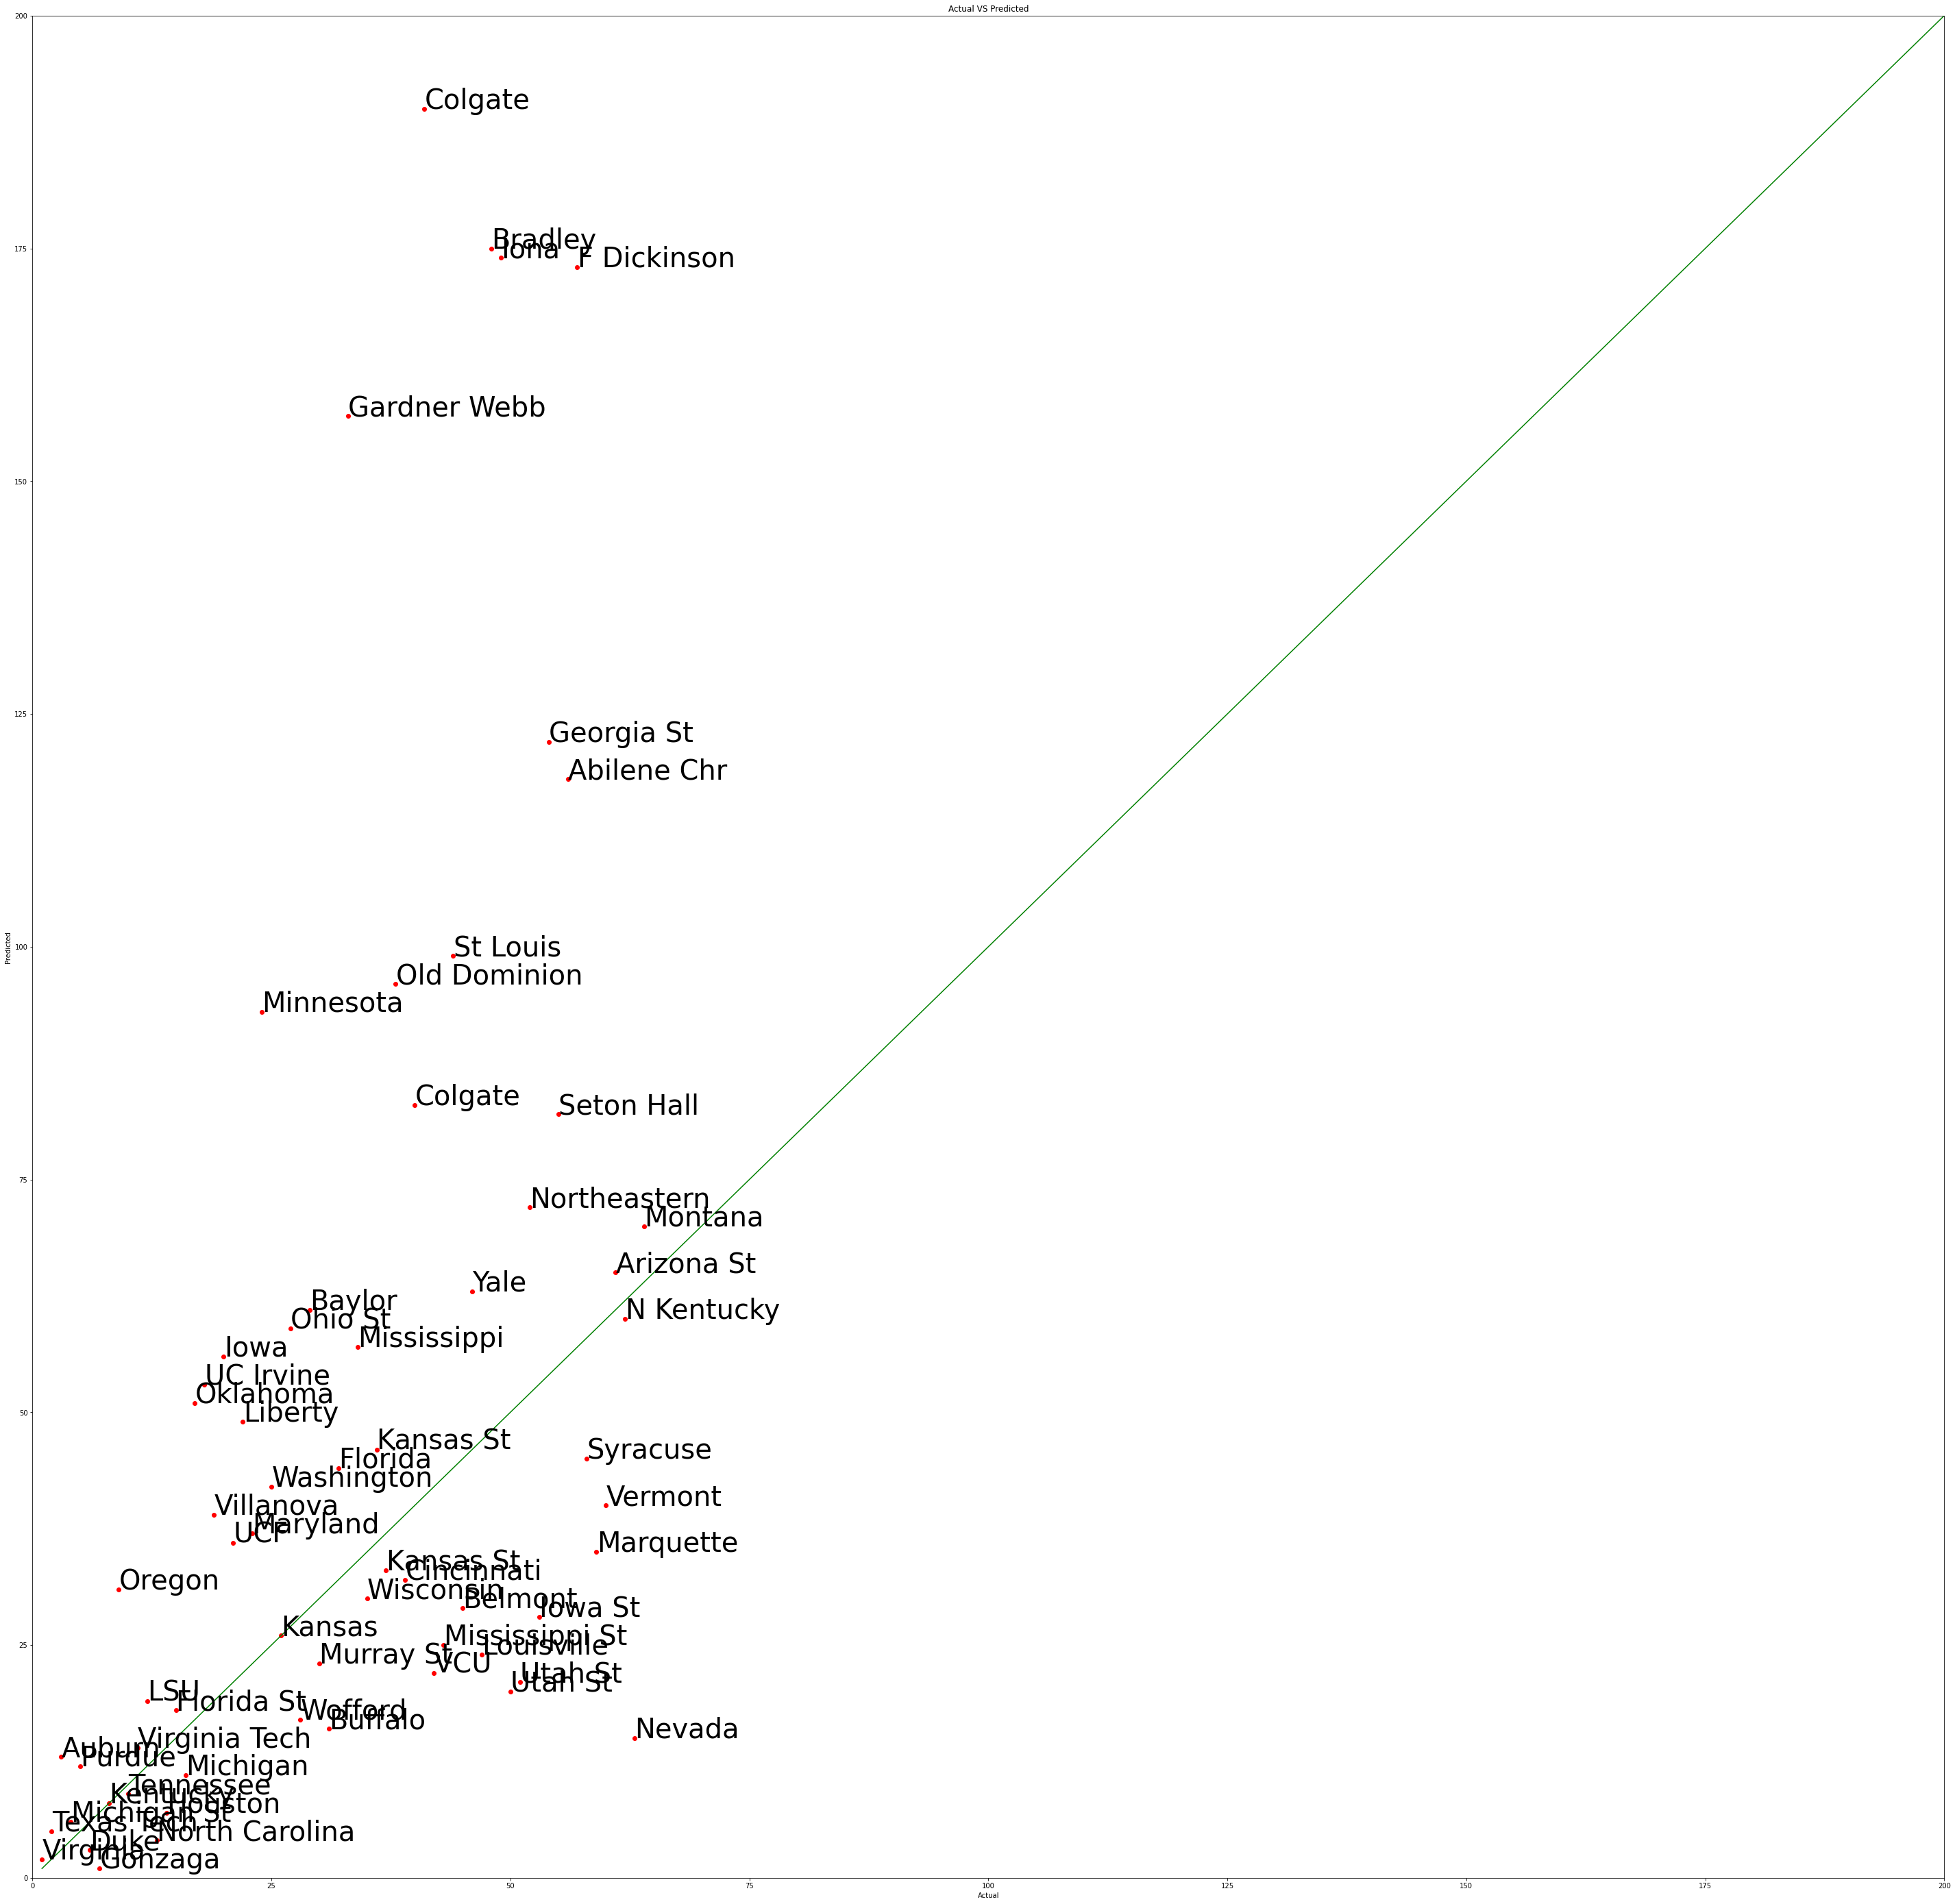

In [11]:
plt.ylim(0,200)
plt.xlim(0,200)
plt.scatter(x, y, color = "red")
plt.plot(reg, reg, color = "green")
plt.title("Actual VS Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.rcParams["figure.figsize"] = (50,50)

count = 0
while(count < 64):
    x2 = x[count]
    y2 = y[count]
    word = act_labels[count]
    plt.text(x2+.03, y2+.03, word, fontsize=40)
    count += 1

plt.show()